This part of the notebook is devoted to the analysis of Bayesian optimization of one-dimensional functions from a file Functions.py. For this work is used library GPyOpt. You can install it from a terminal : pip install gpyopt. I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that is dependent from the coordinate. And then I compare the results.


In [516]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *


Populating the interactive namespace from numpy and matplotlib


func:  michalewicz
without noise


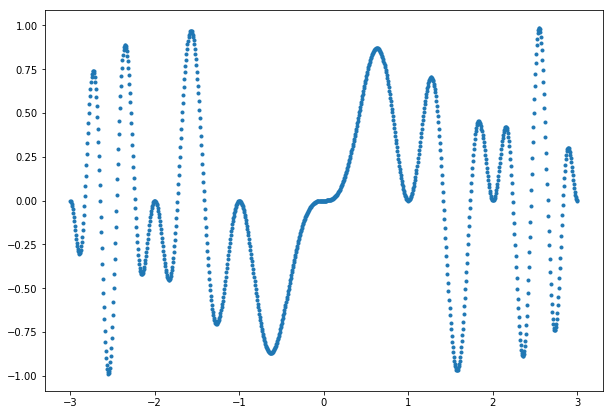

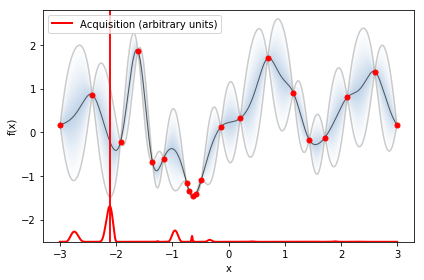

with noise


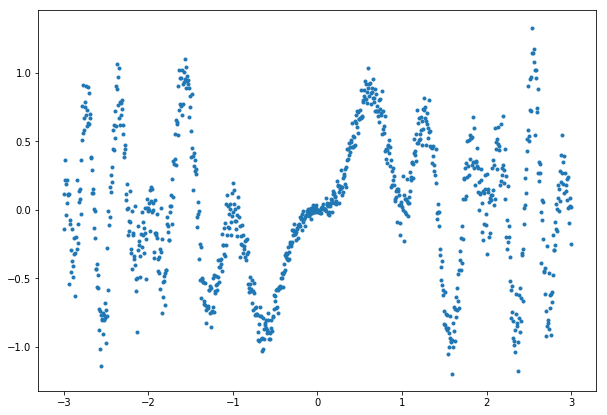

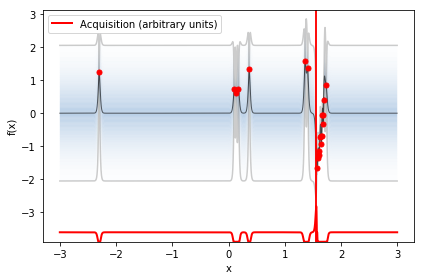

x_opt_without_noise =  [-0.62551757] , x_opt_with_noise =  [1.57210506] , diff =  [2.19762263]
y_opt_without_noise =  -0.8699169159139318 , y_opt_with_noise =  -1.1160513564331696 , diff =  0.24613444051923772
func:  ackley1
without noise


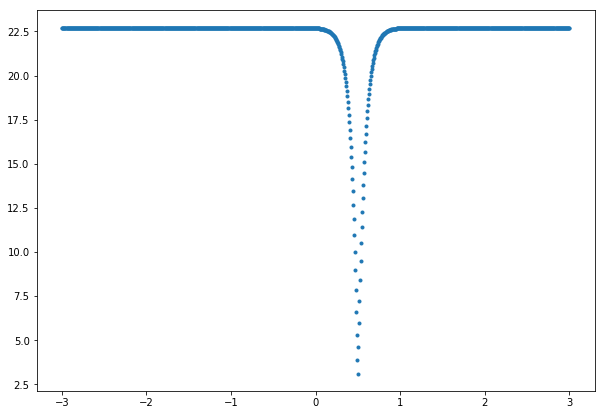

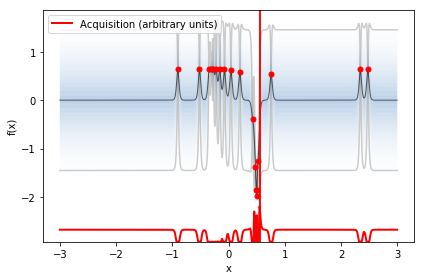

with noise


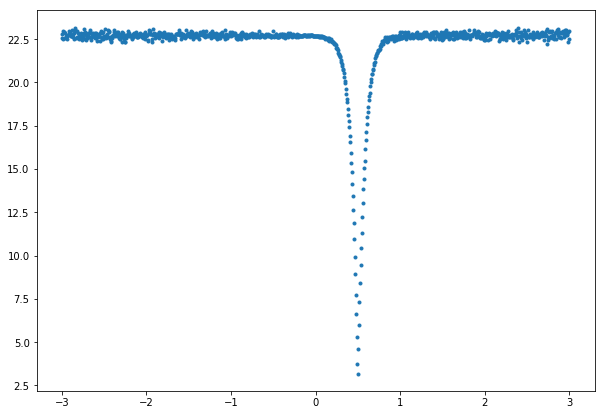

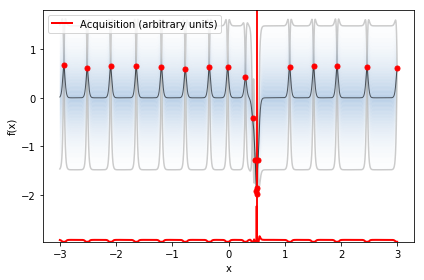

x_opt_without_noise =  [0.50126233] , x_opt_with_noise =  [0.50296101] , diff =  [0.00169868]
y_opt_without_noise =  3.0464715226076966 , y_opt_with_noise =  3.332881959947076 , diff =  0.28641043733937943
func:  gsobol
without noise


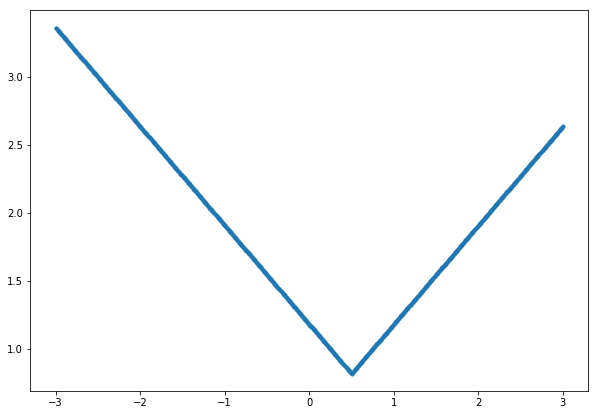

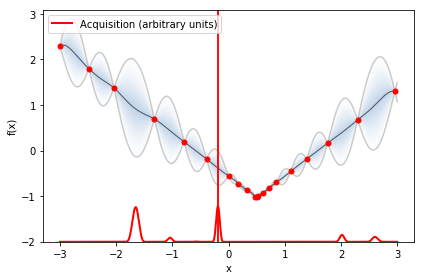

with noise


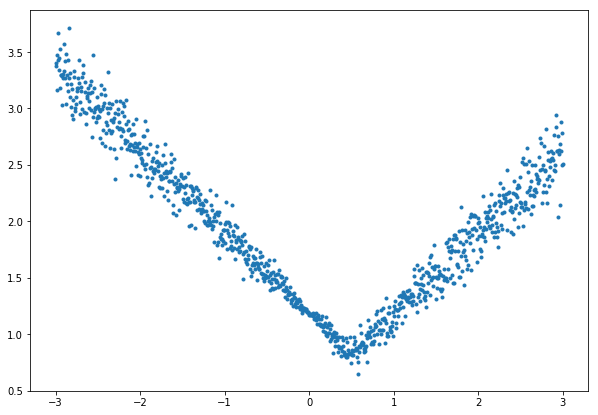

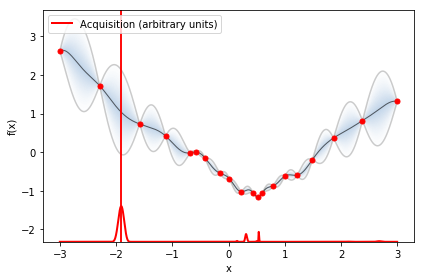

x_opt_without_noise =  [0.51121466] , x_opt_with_noise =  [0.51882912] , diff =  [0.00761446]
y_opt_without_noise =  0.8263379371110186 , y_opt_with_noise =  0.8277951259763504 , diff =  0.0014571888653318599
func:  michalewicz5
without noise


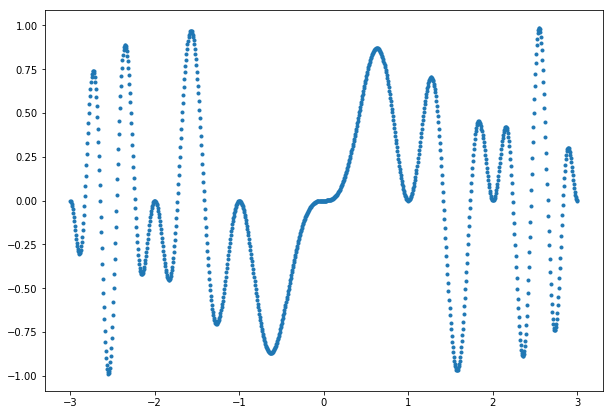

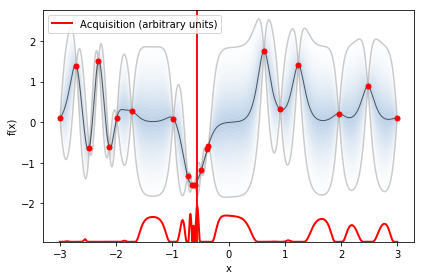

with noise


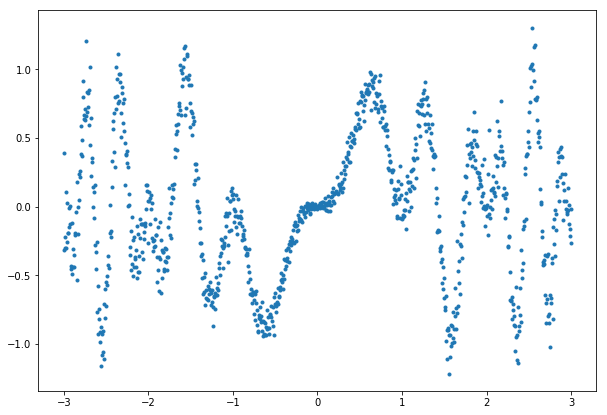

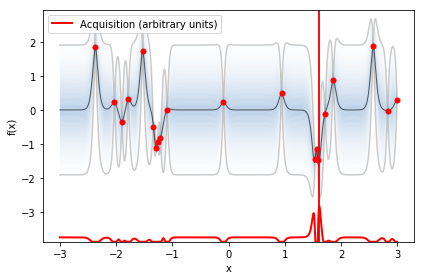

x_opt_without_noise =  [-0.64366609] , x_opt_with_noise =  [1.58708676] , diff =  [2.23075286]
y_opt_without_noise =  -0.8674500764277852 , y_opt_with_noise =  -1.060898364735873 , diff =  0.1934482883080878
func:  sqmichalewicz5
without noise


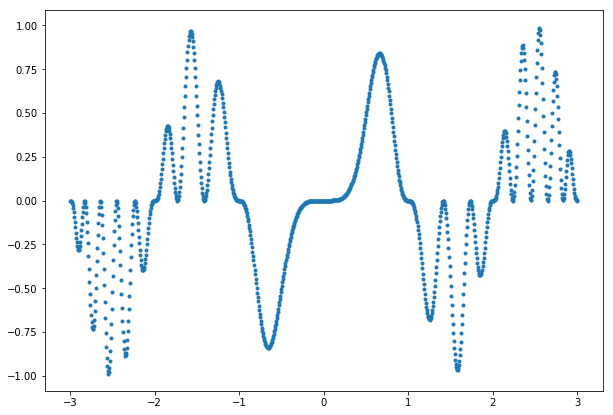

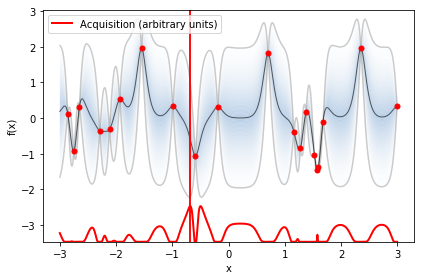

with noise


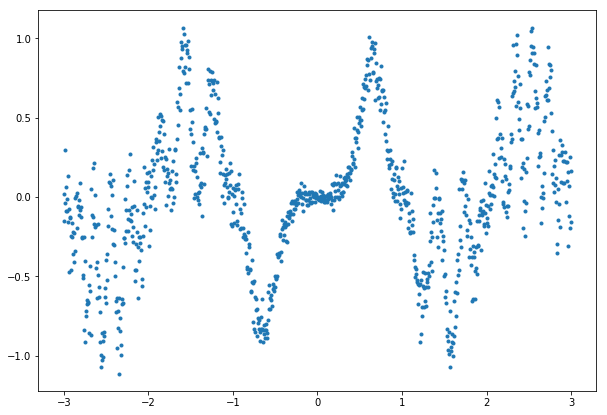

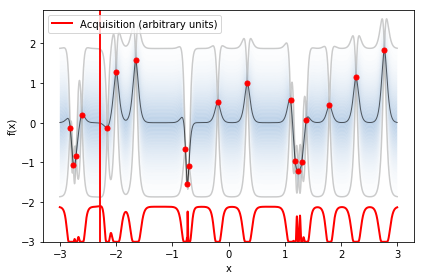

x_opt_without_noise =  [1.56930155] , x_opt_with_noise =  [-0.73361782] , diff =  [2.30291937]
y_opt_without_noise =  -0.9630522428269443 , y_opt_with_noise =  -0.9576259825523918 , diff =  0.005426260274552508
func:  rosenbrock5
without noise


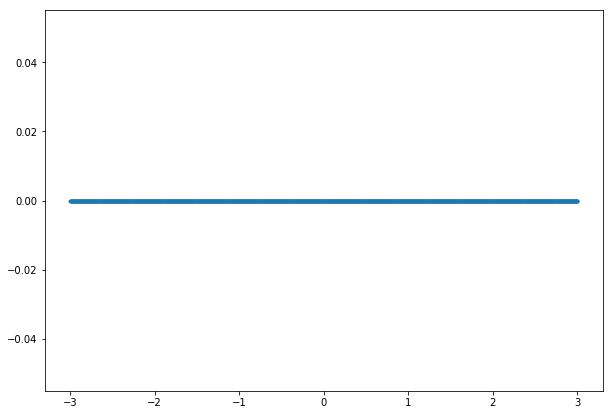

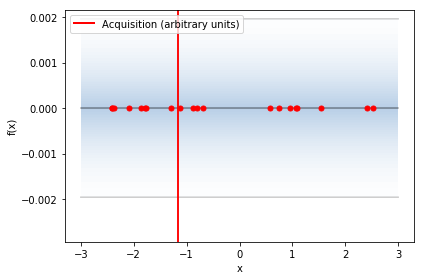

with noise


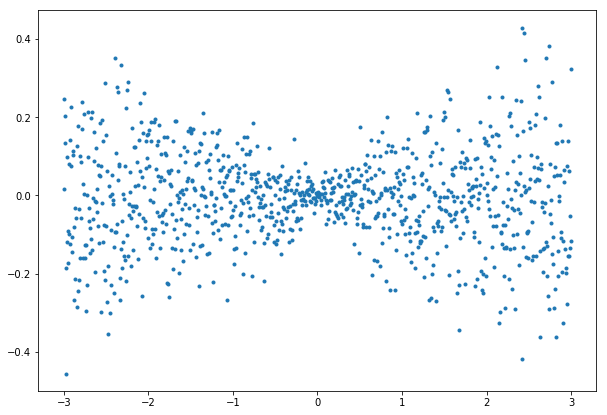

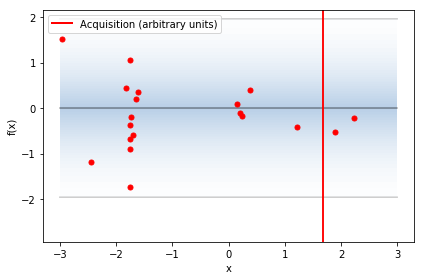

x_opt_without_noise =  [0.73838306] , x_opt_with_noise =  [-1.75738383] , diff =  [2.49576689]
y_opt_without_noise =  0.0 , y_opt_with_noise =  -0.16646521712748596 , diff =  0.16646521712748596


In [512]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'rosenbrock5']

#required set of constants
N = 1000
X = np.linspace(-3, 3, N).reshape (- 1, 1)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)}]  # problem constraints 

max_iter = 15 # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


for name in function_names:
    #first function - without noise    
    def f(X):
        return functionDoESpecial (X, name)
    print "func: ", name
    y = f(X)
    print 'without noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')

    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_without_noise.plot_acquisition()


    
    
    #second function - with noise   
    def f(X):
        # target function  + heteroscadastic noise
        return functionDoESpecial (X, name) + \
        0.1 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))), 1)[0]
    
 
    y = f(X)
    print 'with noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')
    
    

    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_with_noise.plot_acquisition()
    
    
    #compare results
    diff_x = np.abs (bayes_opt_without_noise.x_opt - bayes_opt_with_noise.x_opt)
    diff_y = np.abs (bayes_opt_without_noise.fx_opt - bayes_opt_with_noise.fx_opt)
    print "x_opt_without_noise = ", bayes_opt_without_noise.x_opt, ", x_opt_with_noise = ", bayes_opt_with_noise.x_opt, ", diff = ", diff_x
    print "y_opt_without_noise = ", bayes_opt_without_noise.fx_opt, ", y_opt_with_noise = ", bayes_opt_with_noise.fx_opt, ", diff = ", diff_y
       

In this part of the notebook I analyze the behavior of Bayesian optimization on function 'michalewicz'. I apply optimization many times for function without noise and function with noise, and then I look at the mean values and medians.

In [533]:
def f_without_noise(X):
        return functionDoESpecial (X, "michalewicz")

def f_with_noise(X):
        # target function  + heteroscadastic noise
        return functionDoESpecial (X, "michalewicz") + \
        0.1 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))), 1)[0]
    
    

In [534]:
iter = 30

# four arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_noise = np.array([])


for i in range(iter):
    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_without_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter, max_time, eps)     
    
    x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
    y_opt_without_noise = np.append (y_opt_without_noise, bayes_opt_without_noise.fx_opt)
    
    
    
    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f_with_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter, max_time, eps) 
    
    x_opt_with_noise = np.append (x_opt_with_noise, bayes_opt_with_noise.x_opt)
    y_opt_with_noise = np.append (y_opt_with_noise, bayes_opt_with_noise.fx_opt)
    
    


print 'x_opt_without_noise:\n', x_opt_without_noise, '\n'
print 'y_opt_without_noise:\n', y_opt_without_noise, '\n'

print 'x_opt_with_noise:\n', x_opt_with_noise, '\n'
print 'y_opt_with_noise:\n', y_opt_with_noise, '\n'


print "average x without noise = ", x_opt_without_noise.mean()
print "average x with noise = ", x_opt_with_noise.mean()
print "diff = ", np.abs (x_opt_without_noise.mean() - x_opt_with_noise.mean()), "\n"


print "average y without noise = ", y_opt_without_noise.mean()
print "average y with noise = ", y_opt_with_noise.mean()
print "diff = ", np.abs (y_opt_without_noise.mean() - y_opt_with_noise.mean()), "\n"
    
print "median x without noise = ", np.median (x_opt_without_noise)
print "median x with noise = ", np.median (x_opt_with_noise)
print "diff = ", np.abs (np.median (x_opt_without_noise) - np.median (x_opt_with_noise)), "\n"


print "median y without noise = ", np.median (y_opt_without_noise)
print "median y with noise = ", np.median (y_opt_with_noise)
print "diff = ", np.abs (np.median (y_opt_without_noise) - np.median (y_opt_with_noise)), "\n"
    
    

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

x_opt_without_noise:
[ 1.5667304  -0.61059448 -0.6186752   1.57776201 -2.54549146 -0.62177425
 -2.53078958 -0.61842665 -0.62935047 -0.62742003  1.57795619 -0.62839879
 -0.64519215 -0.61916227  1.57429158 -2.56956465 -0.6313099  -0.61581147
  2.3524735   2.34484723  1.57219449  1.5828316  -0.64061799 -2.54064659
  1.56811425  2.34700169 -2.54895103 -0.61655974  1.57652114  1.58784403] 

y_opt_without_noise:
[-0.96819335 -0.86619633 -0.86884037 -0.96976292 -0.98775829 -0.86946153
 -0.95122934 -0.86878104 -0.8700455  -0.87002366 -0.96967605 -0.87004565
 -0.86688325 -0.86895255 -0.97064671 -0.92587916 -0.86997815 -0.86807167
 -0.88936995 -0.88352848 -0.9705671  -0.9661958  -0.86841372 -0.98191244
 -0.96908998 -0.88638074 -0.98815893 -0.86829048 -0.9702244  -0.96001832] 

x_opt_with_noise:
[ 1.56030606 -1.31180087 -0.60587023 -1.27073099 -0.66498094  1.60417421
 -0.54941748 -0.64041064  2.74177833 -0.65173427  2.66978714 -0.63379262
 -0.65093004  1.58888222 -0.55234486 -0.6311508   1.561180

without noise
with noise


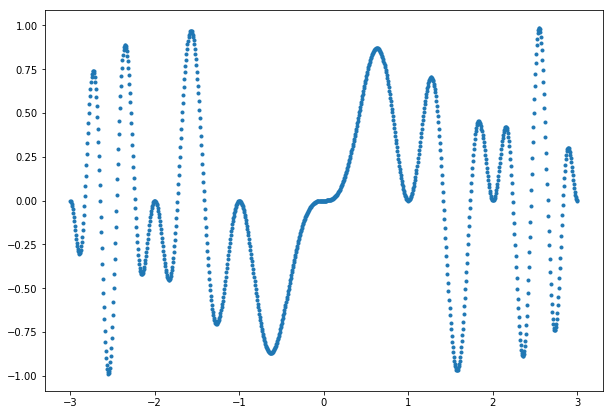

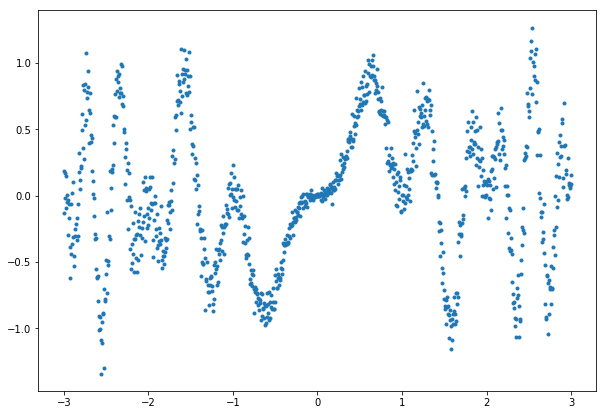

In [535]:
y = f_without_noise(X)
print 'without noise'
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')

y = f_with_noise(X)
print 'with noise'
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')